<a href="https://colab.research.google.com/github/ddekun/prob_theory_and_math_stat/blob/lesson3/lesson3/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Урок 3. Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных**

In [1]:
import numpy as np
from math import factorial
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Сочетания
def combinations(n, k):
    return int(factorial(n) / factorial(k) * factorial(n - k))

### 1. Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий, первый и третий квартили, интерквартильное расстояние. Найти выбросы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [3]:
salary = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [4]:
df_salary = pd.DataFrame(salary)

**Среднее арифметическое**

In [5]:
mean_salary = df_salary.sum() / df_salary.count()
mean_salary

0    65.3
dtype: float64

**Среднее квадратичное отклонение**

In [6]:
salary_std = np.sqrt(((df_salary - mean_salary)**2).sum() / df_salary.count())
salary_std

0    30.823854
dtype: float64

**Смещенная оценка дисперсии**

In [7]:
salary_variance = ((df_salary - mean_salary)**2).sum() / df_salary.count()
salary_variance

0    950.11
dtype: float64

**Несмещенная оценка дисперсии**

In [8]:
salary_variance2 = ((df_salary - mean_salary)**2).sum() / (df_salary.count() - 1)
salary_variance2

0    1000.115789
dtype: float64

**Первый и третий квартили, интерквартильное расстояние.**

Найдем квартили разными способами.

In [11]:
df_salary.quantile([0.25, 0.75]) # 1 способ

,0
0.25,42.0
0.75,81.0


In [14]:
np.percentile(df_salary, [25, 75]) # 2 способ

array([42., 81.])

In [16]:
df_salary.describe() # 3 способ

,0
count,20.000000
mean,65.300000
std,31.624607
min,17.000000
25%,42.000000
50%,67.500000
75%,81.000000
max,150.000000


Найдем интерквартильное расстояние.

In [29]:
iqr = df_salary[0].quantile(0.75) - df_salary[0].quantile(0.25) # 1 способ
iqr

39.0

In [35]:
q25, q75 = np.percentile(df_salary, [25, 75]) # 2 способ
iqr1 = q75 - q25
iqr1

39.0

**Найти выбросы в выборке, используя для этого "усы" из boxplot.**

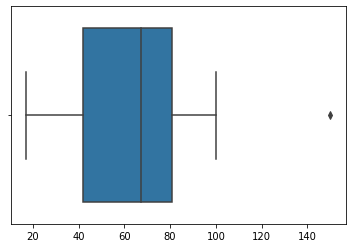

In [37]:
sns.boxplot(salary, orient='v')
plt.show()

In [42]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-16.5, 139.5)

In [56]:
outliers = df_salary.loc[(df_salary[0] < boxplot_range[0]) | (df_salary[0] > boxplot_range[1])]
print(f'выбросы - {outliers[0].value_counts()}')

выбросы - 150    1
Name: 0, dtype: int64


### 2. В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике - 12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?

n - общее количество мячей в корзине

k - количество белых мячей в корзине

a - количество не белых мячей в корзине

b - общее количество вытянутых мячей из корзины

c - количество не белых вытянутых мячей из корзины

d - количество белых вытянутых мячей из корзины

Напишем функцию для ящика.

In [17]:
def box(n, k, a, b, c, d):
    return(factorial(k) / (factorial(d)*factorial(k - d)) * factorial(a)) / (factorial(c)*factorial(a - c)) / (factorial(n) / (factorial(b)*factorial(n - b))) 

In [18]:
A = box(8, 5, 3, 2, 2, 0) * box(12, 5, 7, 4, 1, 3) + box(8, 5, 3, 2, 1, 1) * box(12, 5, 7, 4, 2, 2) + box(8, 5, 3, 2, 0, 2) * box(12, 5, 7, 4, 3, 1)
print(f'Вероятность того, что 3 мяча белые - {A:.3f}')

Вероятность того, что 3 мяча белые - 0.369


### 3. В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a). на факультете A б). на факультете B в). на факультете C?

Вероятность того, что студент учится на факультете A: P(A) = 0.25

Вероятность того, что студент учится на факультете B: P(B) = 0.25

Вероятность того, что студент учится на факультете C: P(C) = 0.5

Вероятность сдачи сдачи сессии:
*   $P(A_a) = 0.8$
*   $P(B_b) = 0.7$
*   $P(C_c) = 0.9$

Найдем полную вероятность, что сдадут все студенты:

$P = P(A)*P(A_a) + P(B)*P(B_b) + P(A)*P(C_c)$

In [57]:
P = 0.25 * 0.8 + 0.25 * 0.7 + 0.5 * 0.9
P

0.825

In [60]:
p1 = 0.25 * 0.8 / P
p2 = 0.25 * 0.7 / P
p3 = 0.5 * 0.9 / P
print(f'Вероятность, что студент учится: \na). на факультете A - {p1:.3f}\nб). на факультете B - {p2:.3f}\nв). на факультете C - {p3:.3f}')

Вероятность, что студент учится: 
a). на факультете A - 0.242
б). на факультете B - 0.212
в). на факультете C - 0.545


### 4. Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: а). все детали б). только две детали в). хотя бы одна деталь г). от одной до двух деталей?

In [64]:
P_a = 0.1 * 0.2 * 0.25
print(f'Вероятность того, что в первый месяц выйдут из строя:\nа). все детали - {P_a:.3f}')

Вероятность того, что в первый месяц выйдут из строя:
а). все детали - 0.005


B1 - из строя вышли первая и вторая деталь, но не вышла третья

B2 - из строя вышла первая и третья деталь, но не вышла вторая

B3 - из строя вышла вторая и третья деталь, но не вышла первая

В = B1 + B2 + B3 - из строя вышло только две детали

In [68]:
P_b = 0.1 * 0.2 * (1 - 0.25) + 0.1 * (1 - 0.2) * 0.25 + (1 - 0.1) * 0.2 * 0.25
print(f'Вероятность того, что в первый месяц выйдут из строя:\nб). только две детали - {P_b:.2f}')

Вероятность того, что в первый месяц выйдут из строя:
б). только две детали - 0.08


In [72]:
P_c = 1 - (1 - 0.1) * (1 - 0.2) * (1 - 0.25)
print(f'Вероятность того, что в первый месяц выйдет из строя:\nв). хотя бы одна деталь - {P_c:.2f}')

Вероятность того, что в первый месяц выйдут из строя:
в). хотя бы одна деталь - 0.46


D1 - из строя вышла первая деталь

D2 - из строя вышла вторая деталь

D3 - из строя вышла третья деталь

D - из строя вышло от одной деталь до двух деталей

D = B + (D1 * D2 * D3)

In [77]:
P_d  = P_b + (0.1 * (1 - 0.2) * (1 - 0.25) + (1 - 0.1) * 0.2 * (1 - 0.25) + (1 - 0.1) * (1 - 0.2) * 0.25)
print(f'Вероятность того, что в первый месяц выйдет из строя:\nг). от одной до двух деталей - {P_d:.3f}')

Вероятность того, что в первый месяц выйдет из строя:
г). от одной до двух деталей - 0.455
